<a href="https://colab.research.google.com/github/patitapaband/patitapaband/blob/main/ANN_Training_1st_Feb_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step1- Importing necessary Libraries**

In [50]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical # Required only for multi-class classification problem
import matplotlib.pyplot as plt

In [52]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [53]:
# Print the shape of the dataset
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [51]:
np.random.seed(42)
tf.random.set_seed(42)


## **Step 2: Load and Explore the Dataset**

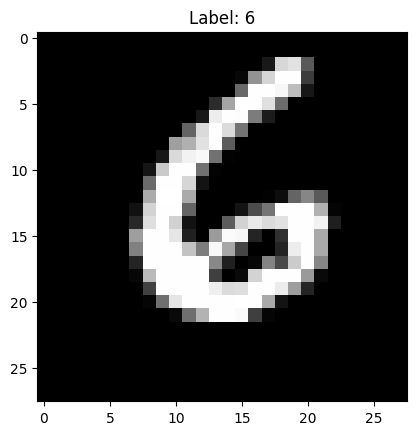

In [54]:
# Display any random index image in the training set
plt.imshow(X_train[90], cmap='gray')
plt.title(f"Label: {y_train[90]}")
plt.show()

In [55]:
X_train[90]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  25, 214, 225,  90,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7, 145, 212, 253, 253,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 106, 253, 253, 246, 188,  23,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         45, 164, 254, 253, 223, 108,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24,
        236, 253, 252, 124,  28,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 100, 217,
        253, 218, 116,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 158, 175, 225,
        253,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 217, 241, 248,
        114,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  21, 201, 253, 253, 114,
          3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 107, 253, 253, 213,  19,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 170, 254, 254, 169,   0,
          0,   0,   0,   0,   2,  13, 100, 133,  89,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 210, 253, 253, 100,   0,
          0,   0,  19,  76, 116, 253, 253, 253, 176,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  41, 222, 253, 208,  18,   0,
          0,  93, 209, 232, 217, 224, 253, 253, 241,  31,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 157, 253, 253, 229,  32,   0,
        154, 250, 246,  36,   0,  49, 253, 253, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 128, 253, 253, 253, 195, 125,
        247, 166,  69,   0,   0,  37, 236, 253, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  37, 253, 253, 253, 253, 253,
        135,  32,   0,   7, 130,  73, 202, 253, 133,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 185, 253, 253, 253, 253,
         64,   0,  10, 210, 253, 253, 253, 153,   9,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  66, 253, 253, 253, 253,
        238, 218, 221, 253, 253, 235, 156,  37,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   5, 111, 228, 253, 253,
        253, 253, 254, 253, 168,  19,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 110, 178,
        253, 253, 249,  63,   5,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

# **Step3- Preprocess the data**


In [58]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [59]:
# One-hot encode the labels (Only and Only required for multi class classification problem statement)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [62]:
y_train[90]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [63]:
X_train[0].flatten().shape
## Flatter the multi dimention array

(784,)

# **Step4- Build the Nural Network**

Nural Network


1. ANN- Structured Data
2. CNN- Image Data (Need to convert in to Structured data)
3. RNN- TextData/ Audio/Video Data

1. x[---------], y[1,0,0,0,0,0,0,0,0,0,0] flattening
2. x[---------], y[0,0,0,1,0,0,0,0,0,0,0]

In [64]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into vectors
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class)
])

# Ativation function
# Number of Nurons in the activation layer/layer
# Hiddin layer

#                            number of Nurons    Activation Function
# regresion                         1              relu
# Binary classification             1          ... Sigmoid, Tenh
# Multi Class Classification   number of classes  Sofymask

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# **Step5: Train the Neural Network**

In [67]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=32, verbose=2)

Epoch 1/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9225 - loss: 0.2702 - val_accuracy: 0.9635 - val_loss: 0.1249
Epoch 2/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9645 - loss: 0.1203 - val_accuracy: 0.9678 - val_loss: 0.1001
Epoch 3/10
1688/1688 - 8s - 5ms/step - accuracy: 0.9757 - loss: 0.0827 - val_accuracy: 0.9717 - val_loss: 0.0895
Epoch 4/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9824 - loss: 0.0606 - val_accuracy: 0.9727 - val_loss: 0.0867
Epoch 5/10
1688/1688 - 9s - 5ms/step - accuracy: 0.9872 - loss: 0.0449 - val_accuracy: 0.9735 - val_loss: 0.0858
Epoch 6/10
1688/1688 - 6s - 4ms/step - accuracy: 0.9911 - loss: 0.0335 - val_accuracy: 0.9763 - val_loss: 0.0860
Epoch 7/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9939 - loss: 0.0246 - val_accuracy: 0.9762 - val_loss: 0.0867
Epoch 8/10
1688/1688 - 11s - 6ms/step - accuracy: 0.9955 - loss: 0.0188 - val_accuracy: 0.9767 - val_loss: 0.0918
Epoch 9/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9960 - loss: 0.0157 - val_accuracy: 0.9778 

In [68]:
# Predict the first 10 images in the test set
predictions = model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


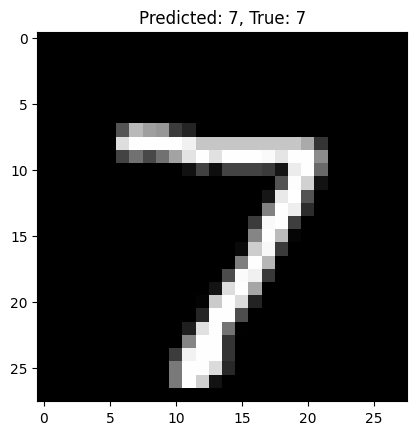

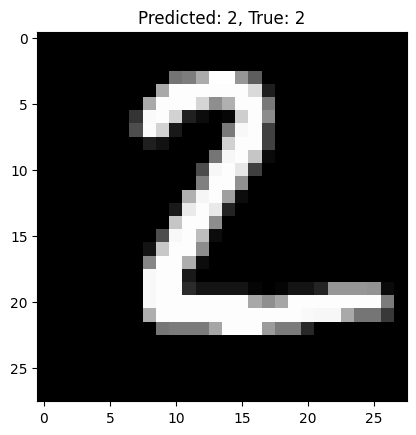

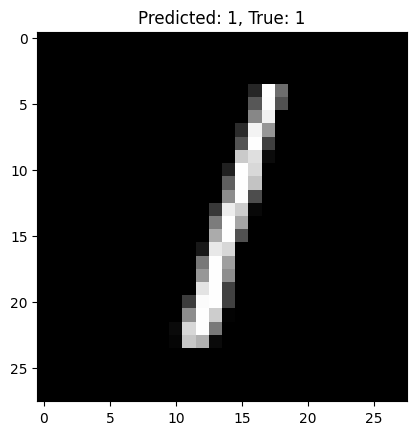

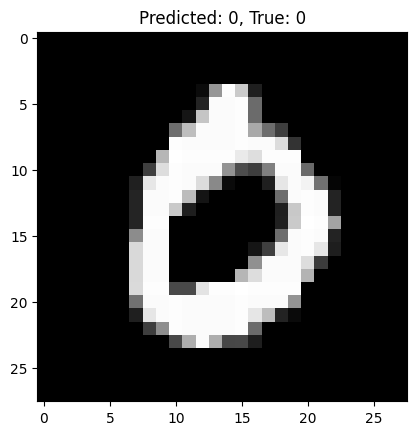

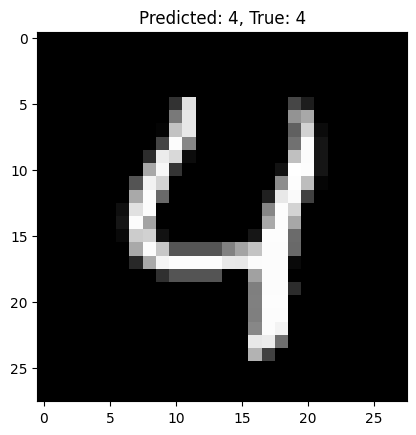

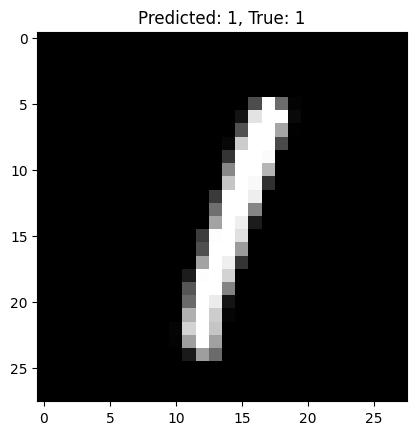

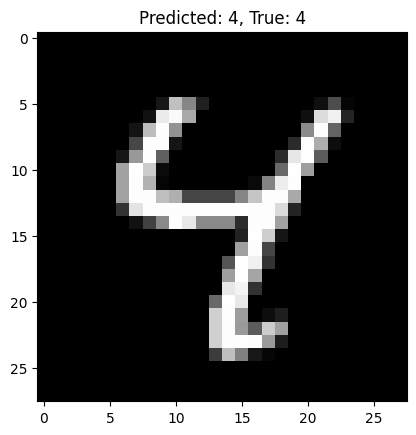

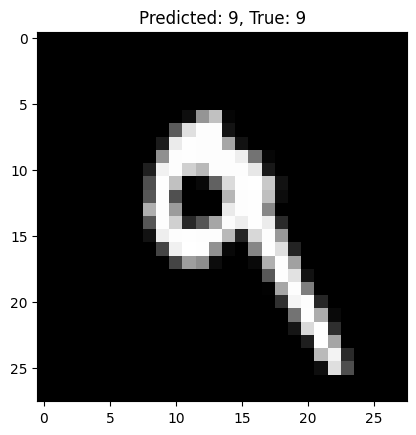

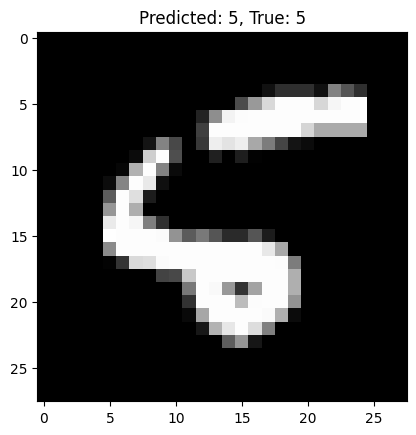

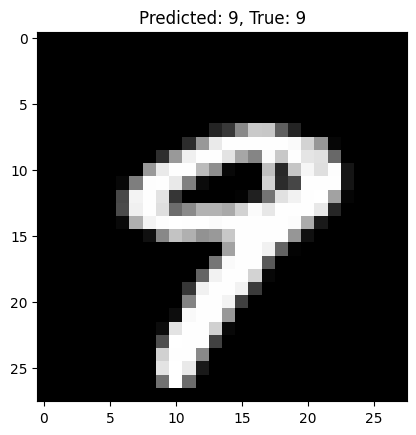

In [69]:
for i in range(10):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}")
    plt.show()

In [70]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 97.62%
